# Exploration of Projection Spaces

In [1]:
# Feel free to add dependencies, but make sure that they are included in environment.yml

#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import altair as alt
from altair import datum
alt.data_transformers.disable_max_rows()

from sklearn import manifold
from openTSNE import TSNE
from umap import UMAP

## Data
To be able to explore paths in a projected space, you need to pick a problem/algorithm/model that consists of multiple states that change interatively.

<details>
    <summary><a>Click to see an Example</a></summary>

    
An example is the solving of a Rubik's Cube. After each rotation the state of the cube changes. This results in a path from the initial state, through the individual rotations, to the solved cube.
By using projection, we can examine the individual states and paths in the two-dimensional space.
Depending on the initial state and the solution strategy the paths will differ or resemble each other.
    
This is an example of solving 10 randomly scrambled Rubik's Cubes with two different strategies, the Beginner (in green) and the Fridrich Method (in orange):
<div>
    <img alt="Rubiks's Cube Sovling Strategies" src="rubiks.png" width="600"/>
</div>
You can see that although each cube is scrambled differently in the beginning, both strategies converge to the same paths after a few steps.
You can also notice that the Beginner's method takes some additional paths that are not necessary with the Fridrich method.
</details>

### Read and Prepare Data
Read in your data from a file or create your own data.

Document any data processing steps.

In [2]:
rubik = pd.read_csv('data/rubiks/cube.csv')
rubik.head()

line             cp       algo up00 up01 up02 up10 up11 up12 up20  ...  \
0     0          start   beginner    O    G    W    G    W    Y    Y  ...   
1     0   intermediate   beginner    O    G    W    G    W    Y    G  ...   
2     0   intermediate   beginner    O    G    W    G    W    Y    G  ...   
3     0   intermediate   beginner    O    G    R    G    W    Y    G  ...   
4     0   intermediate   beginner    G    G    O    R    W    G    R  ...   

  down22 back00 back01 back02 back10 back11 back12 back20 back21 back22  
0      G      W      W      Y      O      B      G      B      O      B  
1      G      W      W      Y      O      B      G      B      O      B  
2      O      O      Y      G      O      B      G      B      O      B  
3      B      O      Y      W      O      B      Y      B      O      B  
4      B      O      Y      W      O      B      Y      R      W      Y  

[5 rows x 57 columns]

### Comments
- Did you transform, clean, or extend the data?  How/Why?

Rubik's cube data was generated using [Rubiks Cube Solver](https://github.com/CubeLuke/Rubiks-Cube-Solver), see `data/rubiks/rubik.notebook.pynb`.
10 Cubes are solved with both, the Fridrich and the Beginner's method; starting at randomly scrambled cubes.

The file contains the states of the cubes (e.g. the color of each tile, on each side), the solving strategy (algo), to which solving attempt the sate belongs (line), and wether the state is a start, end, or intermediate state (cp).

## Projection
Project your data into a 2D space.
Try multiple (3+) projection methods (e.g., t-SNE, UMAP, MDS, PCA, ICA, other methods) with different settings and compare them.

Make sure that all additional dependencies are included when submitting.

In [3]:
# select features for projection:
# We just need to remove the meta data columns (line, cp, algo), and project the cube states:
meta_data = rubik.iloc[:, :3]
proj_data = rubik.iloc[:, 3:]

proj_data.head()

up00 up01 up02 up10 up11 up12 up20 up21 up22 front00  ... down22 back00  \
0    O    G    W    G    W    Y    Y    Y    W       O  ...      G      W   
1    O    G    W    G    W    Y    G    R    B       W  ...      G      W   
2    O    G    W    G    W    Y    G    R    B       W  ...      O      O   
3    O    G    R    G    W    Y    G    R    R       W  ...      B      O   
4    G    G    O    R    W    G    R    Y    R       Y  ...      B      O   

  back01 back02 back10 back11 back12 back20 back21 back22  
0      W      Y      O      B      G      B      O      B  
1      W      Y      O      B      G      B      O      B  
2      Y      G      O      B      G      B      O      B  
3      Y      W      O      B      Y      B      O      B  
4      Y      W      O      B      Y      R      W      Y  

[5 rows x 54 columns]

In [4]:
# one hot encode the colors (White, Green, Red, Orange, Yellow, Blue)
one_hot_rubiks = pd.get_dummies(proj_data)
one_hot_rubiks.head()

up00_B  up00_G  up00_O  up00_R  up00_W  up00_Y  up01_B  up01_G  up01_O  \
0       0       0       1       0       0       0       0       1       0   
1       0       0       1       0       0       0       0       1       0   
2       0       0       1       0       0       0       0       1       0   
3       0       0       1       0       0       0       0       1       0   
4       0       1       0       0       0       0       0       1       0   

   up01_R  ...  back21_O  back21_R  back21_W  back21_Y  back22_B  back22_G  \
0       0  ...         1         0         0         0         1         0   
1       0  ...         1         0         0         0         1         0   
2       0  ...         1         0         0         0         1         0   
3       0  ...         1         0         0         0         1         0   
4       0  ...         0         0         1         0         0         0   

   back22_O  back22_R  back22_W  back22_Y  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         1  

[5 rows x 294 columns]

In [5]:
import math
tsne_coords = manifold.TSNE(perplexity=15).fit_transform(one_hot_rubiks)
tsne_coords.shape

(2161, 2)

In [6]:
# turn coords into pandas dataframe
df_tsne_coords = pd.DataFrame(tsne_coords, columns=['X','Y'])
df_tsne_coords.describe()

X            Y
count  2161.000000  2161.000000
mean     -0.174472     1.313727
std      37.801788    41.307186
min     -85.522339   -73.134750
25%     -25.973326   -29.375425
50%       2.773867    -1.244568
75%      28.492563    28.712860
max      76.320961    99.317253

In [7]:
alt.Chart(df_tsne_coords).mark_circle(
    opacity=0.6
).encode(
    x='X',
    y='Y',
).properties(
    width=500,
    height=400,
    title="Projected Rubiks Cube States"
).interactive()

alt.Chart(...)

In [8]:
# Add meta data for addtional encodings
tsne_rubiks = pd.concat([meta_data, df_tsne_coords], axis='columns')
tsne_rubiks

line             cp       algo          X          Y
0        0          start   beginner -49.112518  35.416534
1        0   intermediate   beginner -48.902344  35.797699
2        0   intermediate   beginner -48.297485  36.873234
3        0   intermediate   beginner -48.383533  37.344147
4        0   intermediate   beginner -47.956051  38.030025
...    ...            ...        ...        ...        ...
2156    19   intermediate   fridrich -65.118942   5.425305
2157    19   intermediate   fridrich -65.957214   9.822532
2158    19   intermediate   fridrich -73.132500   0.631777
2159    19   intermediate   fridrich -77.994057  -9.292925
2160    19            end   fridrich   0.039902 -33.019520

[2161 rows x 5 columns]

In [9]:
alt.Chart(tsne_rubiks).mark_point(
    opacity=0.6
).encode(
    x='X',
    y='Y',
    color='line:N',
    shape='cp:N'
).properties(
    width=700,
    height=700,
    title="Projected Rubiks Cube States"
).interactive()

alt.Chart(...)

In [10]:
alt.Chart(tsne_rubiks).mark_point(
    opacity=0.6
).encode(
    x='X',
    y='Y',
    color='cp:N'
).transform_filter((datum.cp==' start') | (datum.cp==' end')
).properties(
    title="Start & End States"
).interactive()

alt.Chart(...)

### Comments
- Are there patterns in the global _and_ the local structure?

- Which features did you use? Why?

Excluded meta data and projected the colors of all tiles of all sides of the cube.

- Which projection methods did you use? Why?

t-SNE, for demonstration

- Why did you choose these hyperparameters?

We used square root of the number of items (~2000) as a first test which already shows some pattterns in regards to the lines patterns.
However, with lower perplexity, the space became less cluttered which is why we picked 15.

- Are there patterns in the global _and_ the local structure?

try to find out 😉

### Link States
Connect the states that belong together.

The states of a single solution should be connected to see the path from the start to the end state.
How the points are connected is up to you, for example, with straight lines or splines.

In [11]:
#make index a column to connect the points in the right order
tsne_rubiks = tsne_rubiks.rename_axis('index1').reset_index()

In [12]:
alt.Chart(tsne_rubiks).mark_line(
    opacity=0.6
).encode(
    x='X',
    y='Y',
    color='line:N', #color lines by solving attempt
    order='index:Q' # connect them in order (instead of position on x-axis)
).properties(
    width=700,
    height=700,
    title="Paths of solving attempts"
).interactive()

alt.Chart(...)

### Meta Data Encoding 
Encode addtional features in the visualization.

Use features of the source data and include them in the projection, e.g., by using color, opacity, different shapes or line styles, etc.

In [13]:
alt.Chart(tsne_rubiks).mark_line(
    opacity=0.3
).encode(
    x='X',
    y='Y',
    detail='line:N', # draw one line per attempt, but ...
    color='algo:N', # .. color the lines per solving strategy
    order='index:Q'
).properties(
    width=700,
    height=700,
    title="Solving attempts by strategy"
).interactive() + alt.Chart(tsne_rubiks).transform_filter(
    (datum.cp == ' end') | (datum.cp == ' start') # no intermediate states
).mark_point().encode(
    x='X',
    y='Y',
    shape='cp:N',
    color='algo:N', # .. color the lines per solving strategy
).properties(
    width=700,
    height=700
).interactive()

alt.LayerChart(...)

In [14]:
alt.Chart(tsne_rubiks).mark_line(
    opacity=0.3
).encode(
    x='X',
    y='Y',
    detail='line:N', # draw one line per attempt, but ...
    color='algo:N', # .. color the lines per solving strategy
    order='index:Q',
    column='algo:N'
).properties(
    title="Solving attempts by strategy"
).interactive()

alt.Chart(...)

### Comments
- Which features did you use? Why?
- How are the features encoded?

The lines are colored by the applied method (Fridrich or Beginner), as the individual solving attempts are not of interest. Start & end states are shown for each line, intermediate states are hidden to avoid clutter.
In the second visualization with facet by applied to see the individual patterns better.

## Optional
<details>
    <summary><a>Projection Space Explorer (click to reveal)</a></summary>

    
<h2>Projection Space Explorer</h2>

The <a href="https://jku-vds-lab.at/pse/">Projection Space Explorer</a> is a web application to plot and connect two dimensional points. 
Metadata of the data points can be used to encode additonal information into the projection, e.g., by using different shapes or colors.
    
Further Information:
<ul>
    <li>Paper: <a href="https://jku-vds-lab.at/publications/2020_tiis_pathexplorer/">https://jku-vds-lab.at/publications/2020_tiis_pathexplorer/</a>
    <li>Repo: <a href="https://github.com/jku-vds-lab/projection-space-explorer/">https://github.com/jku-vds-lab/projection-space-explorer/</a>
    <li>Application Overview: <a href="https://jku-vds-lab.at/pse/">https://jku-vds-lab.at/pse/</a>
</ul>

<h3>Data Format</h3>
How to format the data can be found in the <a href="https://github.com/jku-vds-lab/projection-space-explorer/#data-format">Projection Space Explorer's README</a>.

Example data with three lines, with two colors (algo) and additional mark encoding (cp):

<table>
<thead>
  <tr>
    <th>x</th>
    <th>y</th>
    <th>line</th>
    <th>cp</th>
    <th>algo</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>0.0</td>
    <td>0</td>
    <td>0</td>
    <td>start</td>
    <td>1</td>
  </tr>
  <tr>
    <td>2.0</td>
    <td>1</td>
    <td>0</td>
    <td>state</td>
    <td>1</td>
  </tr>
  <tr>
    <td>4.0</td>
    <td>4</td>
    <td>0</td>
    <td>state</td>
    <td>1</td>
  </tr>
  <tr>
    <td>6.0</td>
    <td>1</td>
    <td>0</td>
    <td>state</td>
    <td>1</td>
  </tr>
  <tr>
    <td>8.0</td>
    <td>0</td>
    <td>0</td>
    <td>state</td>
    <td>1</td>
  </tr>
  <tr>
    <td>12.0</td>
    <td>0</td>
    <td>0</td>
    <td>end</td>
    <td>1</td>
  </tr>
  <tr>
    <td>-1.0</td>
    <td>10</td>
    <td>1</td>
    <td>start</td>
    <td>2</td>
  </tr>
  <tr>
    <td>0.5</td>
    <td>5</td>
    <td>1</td>
    <td>state</td>
    <td>2</td>
  </tr>
  <tr>
    <td>2.0</td>
    <td>3</td>
    <td>1</td>
    <td>state</td>
    <td>2</td>
  </tr>
  <tr>
    <td>3.5</td>
    <td>0</td>
    <td>1</td>
    <td>state</td>
    <td>2</td>
  </tr>
  <tr>
    <td>5.0</td>
    <td>3</td>
    <td>1</td>
    <td>state</td>
    <td>2</td>
  </tr>
  <tr>
    <td>6.5</td>
    <td>5</td>
    <td>1</td>
    <td>state</td>
    <td>2</td>
  </tr>
  <tr>
    <td>8.0</td>
    <td>10</td>
    <td>1</td>
    <td>end</td>
    <td>2</td>
  </tr>
  <tr>
    <td>3.0</td>
    <td>6</td>
    <td>2</td>
    <td>start</td>
    <td>2</td>
  </tr>
  <tr>
    <td>2.0</td>
    <td>7</td>
    <td>2</td>
    <td>end</td>
    <td>2</td>
  </tr>
</tbody>
</table>



Save the dataset to CSV, e.g. using pandas: <tt>df.to_csv('data_path_explorer.csv', encoding='utf-8', index=False)</tt>  
    and upload it in the Projection Space Explorer by clicking on `OPEN FILE` in the top left corner.
    
ℹ You can also include your high dimensionmal data and use it to adapt the visualization.
    
</details>


In [15]:
export = tsne_rubiks.rename(columns={'X': 'x', 'Y': 'y'}) # rename to small x/y
export['line'] = 'L' + export['line'].astype(str) # 'L' prefix to line number
export.head()

index1 line             cp       algo          x          y
0       0   L0          start   beginner -49.112518  35.416534
1       1   L0   intermediate   beginner -48.902344  35.797699
2       2   L0   intermediate   beginner -48.297485  36.873234
3       3   L0   intermediate   beginner -48.383533  37.344147
4       4   L0   intermediate   beginner -47.956051  38.030025

In [16]:
export.to_csv('export/tsne_rubiks.csv', encoding='utf-8', index=False)

## Results
You may add additional screenshots of the Projection Space Explorer.

### Interpretion
- What can be seen in the projection(s)?
- Was it what you expected? If not what did you expect?
- Can you confirm prior hypotheses from the projection?
- Did you get any unexpected insights?


#### Differences between strategies

We can identify some areas where the states are exclusively or mainly hit by only one method:

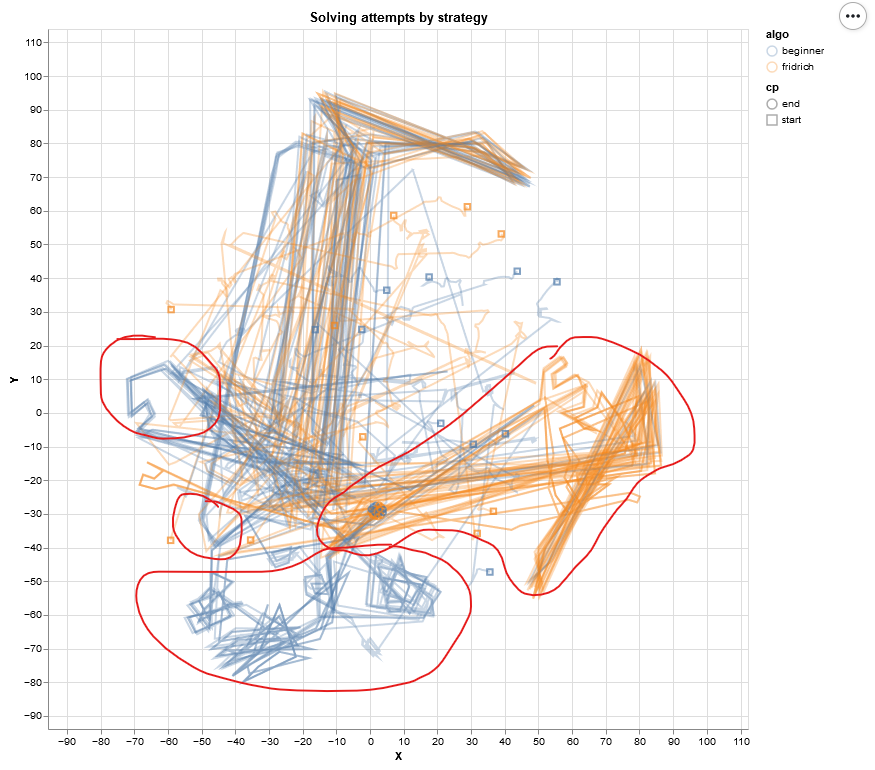

As there are multiple lines at those exclusive states, we assume those are strategy specific checkpoints.

Overall, the states of the Fridrich method appear more dense than those of the Beginner method. This is reasonable, since the Fridrich mehtod solves the cube faster.

#### Similarities between strategies

The states at the top of the projection are hit with both methods:

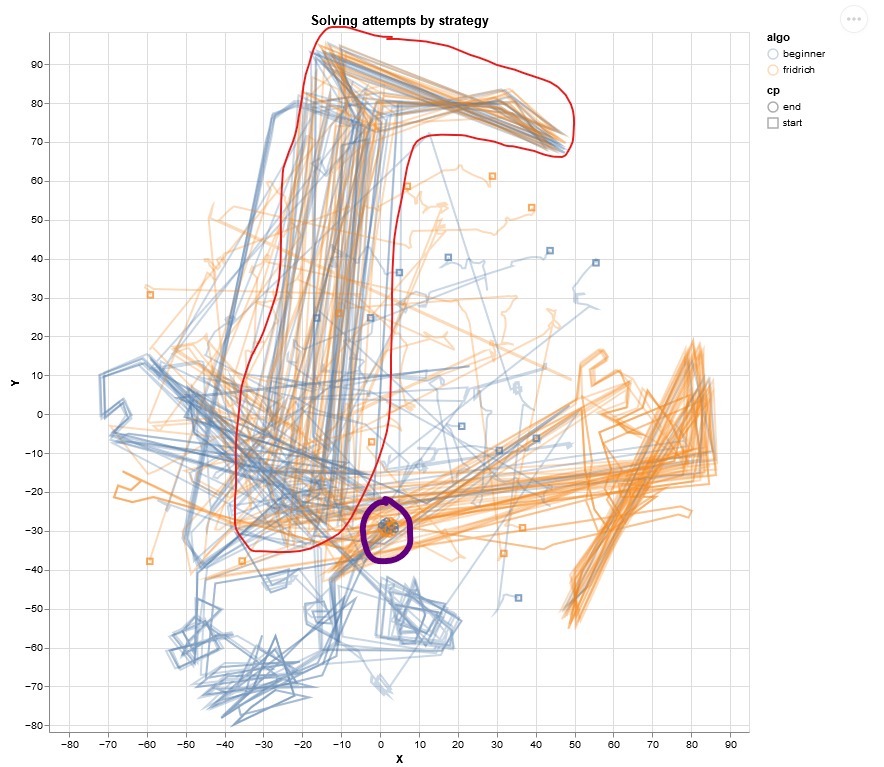


Before these states, the cubes were almost solved (close to the final state in the violet circle), so that such a wide jump seems unreasonable. But a cube with almost all sides solved has to be "destroyed" again to be able to arrange the last colors.

Since only very few changes can be made to the cube at this staate, the two strategies do not differ here.



## Submission
When you’ve finished working on this assignment please download this notebook as HTML and add it to your repository in addition to the notebook file.